In [1]:
#importing datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.metrics import classification_report

In [2]:
#importing dataset

df = pd.read_csv('creditcard.csv')

In [3]:
#preview of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#shape of the dataset
df.shape

#so we have 284,807 rows and 31 columns

(284807, 31)

In [5]:
df.size

8829017

### Model Selection for the Imbalanced Dataset

The models to be used are:

    - Logistic regression
    - One Class Support Vector Machine
    - Random Forest

### DATA PREPROCESSING

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#extracting the independent and dependent variables

#independent x
x = df.iloc[:, :30]

#dependent y
y = df.iloc[:,[30]]

In [8]:
x.shape

(284807, 30)

In [9]:
y.shape

(284807, 1)

In [10]:
#Splitting the test and train datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

### RANDOM FOREST

In [12]:
#fitting the random forest algorithm to the training dataset
#fitting the decision tree classifier to the training set

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy')
classifier_rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [13]:
#predicting the test
y_pred_rf = classifier_rf.predict(x_test)


In [14]:
#printing the variables
print('y_pred_rf: {}'.format(y_pred_rf))

y_pred_rf: [0 0 0 ... 0 0 0]


In [15]:
#creating the confusion matrix
#confusion matrix is not a good measure of accuracy for  imbalanced datasets
from sklearn.metrics import confusion_matrix

#cm_rf = confusion_matrix(y_test, y_pred_rf)

In [16]:
#print(cm_rf)

In [17]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.94      0.79      0.86       120

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [18]:
from sklearn.metrics import average_precision_score
avg_pre_rf = average_precision_score(y_test, y_pred_rf)

print('Average Precision Score: {0:0.3f}'.format(avg_pre_rf))

Average Precision Score: 0.745


Text(0.5, 1.0, 'Precision Recall Curve for Random Forest Algorithm: AP = 0.745 ')

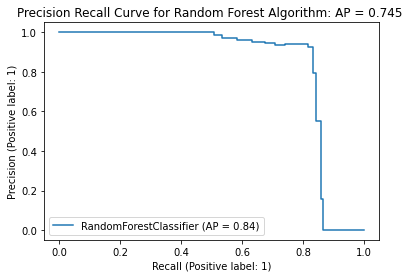

In [38]:
#plotting the precsion recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve as plotp

disp_rf = plotp(classifier_rf, x_test, y_test)
disp_rf.ax_.set_title('Precision Recall Curve for Random Forest Algorithm: '
                   'AP = {0:0.3F} '.format(avg_pre_rf))

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

#logistic regression object
lr = LogisticRegression()

In [21]:
#fitting the model on the dataset

classifier_lr = lr.fit(x_train, y_train.values.ravel())

LogisticRegression()

In [22]:
#predictions
y_pred_lr = classifier_lr.predict(x_test)

In [23]:
#print confusion matrix

#cm_lr = confusion_matrix(y_test, y_pred_lr)
#print(cm)

In [24]:
#print classification report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.67      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [25]:
#getting the average precision score
avg_pre_lr = average_precision_score(y_test, y_pred_lr)

print('Average Precision Score: {0:0.3f}'.format(avg_pre_lr))

Average Precision Score: 0.587


Text(0.5, 1.0, 'Precision Recall Curve for Random Forest Algorithm: AP = 0.587 ')

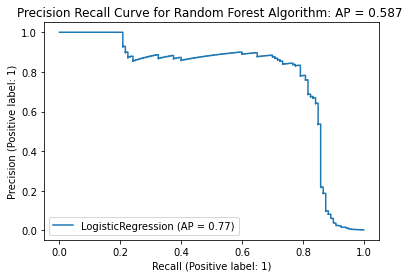

In [37]:
#plotting the precsion recall curve

disp_lr = plotp(lr, x_test, y_test)
disp_lr.ax_.set_title('Precision Recall Curve for Random Forest Algorithm: '
                   'AP = {0:0.3F} '.format(avg_pre_lr))

### Support Vector Machine


In [39]:
#fitting the SVM classifier into the dataset
from sklearn.svm import SVC #'Support Vector Classifier'
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(x_train, y_train.values.ravel())

#kernel = linear cause the data is linearly seperable data

SVC(kernel='linear', random_state=0)

The model performance can be altered by changing the value of C(Regularization factor), gamma, and kernel.

In [41]:
#predicting the test result

y_pred_svm = classifier_svm.predict(x_test)

In [ ]:
#confusion matrix

#cm_svm = confusion_matrix(y_test, y_pred_svm)

In [ ]:
#print(cm_svm)

In [42]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.83      0.81      0.82       120

    accuracy                           1.00     71202
   macro avg       0.91      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [43]:
#getting the average precision score
avg_pre_svm = average_precision_score(y_test, y_pred_svm)

print('Average Precision Score: {0:0.3f}'.format(avg_pre_svm))

Average Precision Score: 0.670


Text(0.5, 1.0, 'Precision Recall Curve for Random Forest Algorithm: AP = 0.670 ')

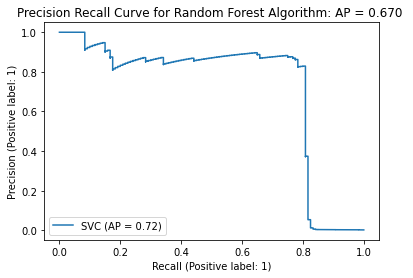

In [44]:
#plotting the precsion recall curve

disp = plotp(classifier_svm, x_test, y_test)
disp.ax_.set_title('Precision Recall Curve for Random Forest Algorithm: '
                   'AP = {0:0.3F} '.format(avg_pre_svm))

## AREA UNDER PRECISION RECALL CURVE